# Loading Data 

In [1]:
import pandas as pd
df = pd.read_csv("/Users/abhi/Downloads/Advertising Budget and Sales.csv")
df.head()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# Checking Basic Info

In [2]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               200 non-null    int64  
 1   TV Ad Budget ($)         200 non-null    float64
 2   Radio Ad Budget ($)      200 non-null    float64
 3   Newspaper Ad Budget ($)  200 non-null    float64
 4   Sales ($)                200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


Unnamed: 0                 0
TV Ad Budget ($)           0
Radio Ad Budget ($)        0
Newspaper Ad Budget ($)    0
Sales ($)                  0
dtype: int64

# Visualizations

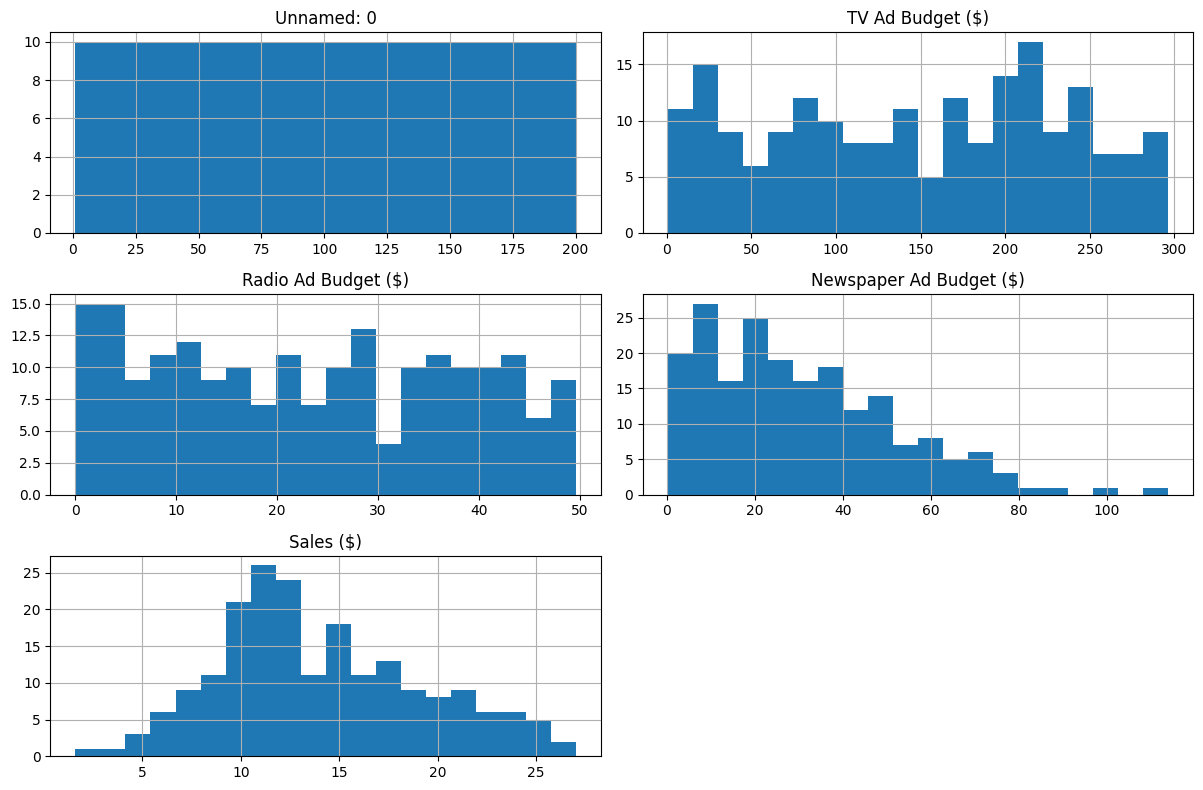

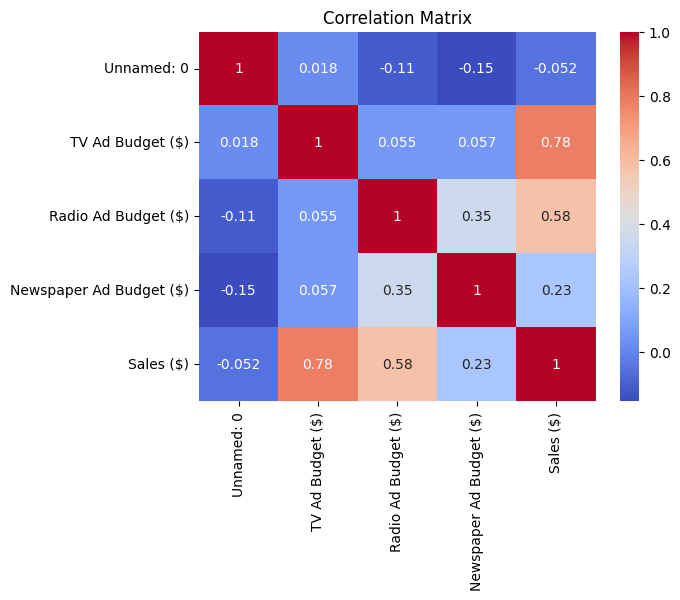

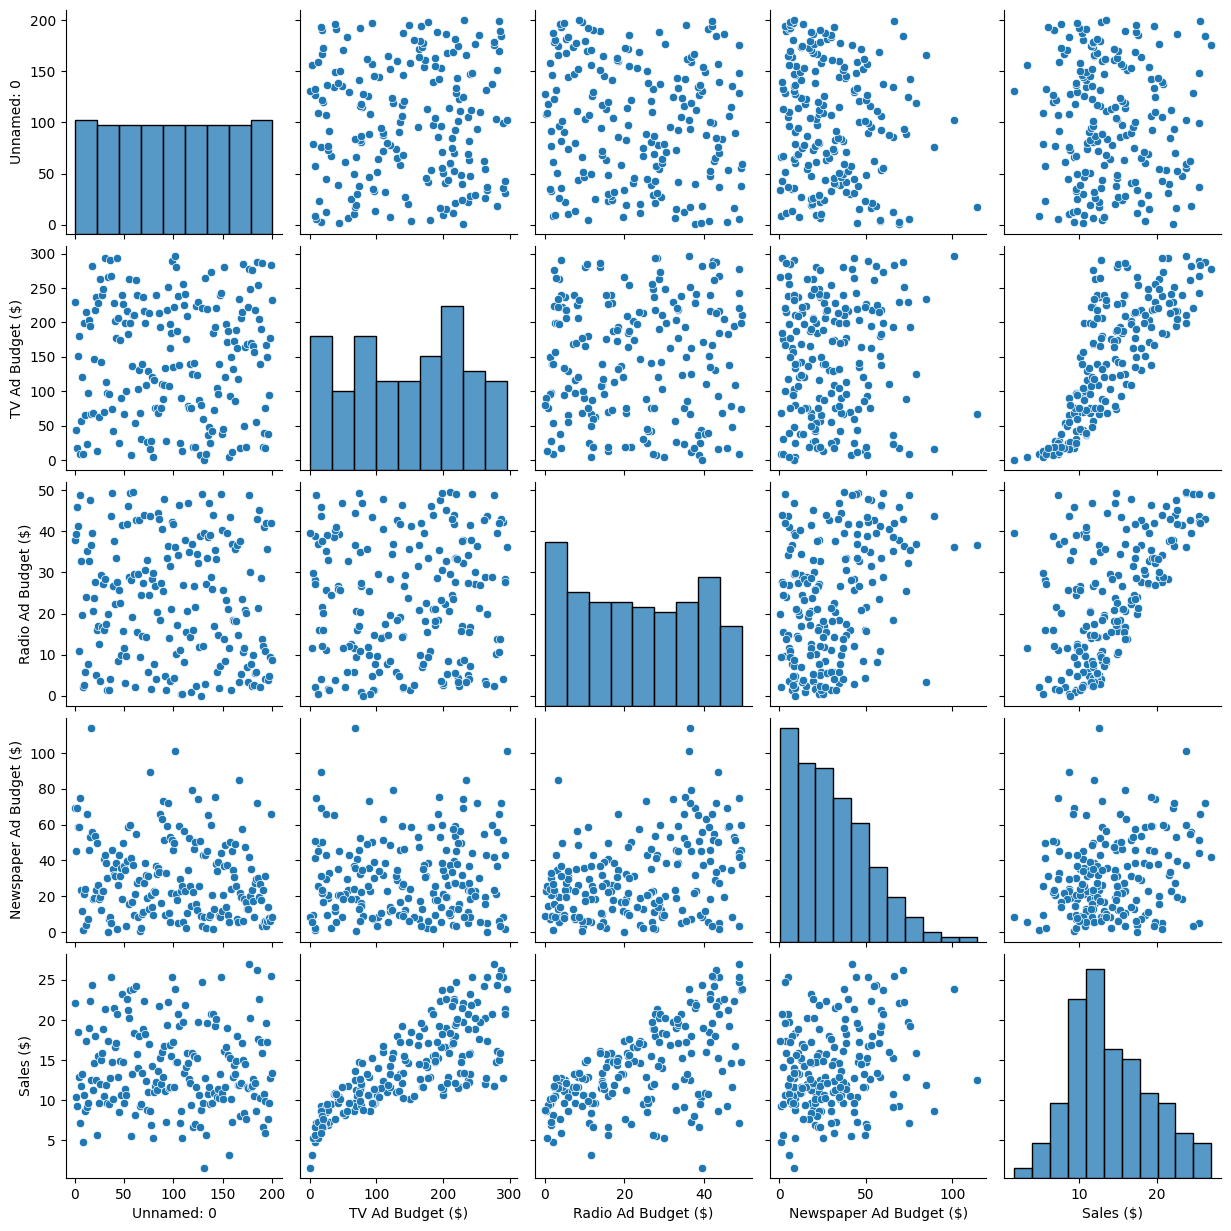

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of each variable
df.hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()

# Correlation heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Pairplot
sns.pairplot(df)
plt.show()

In [6]:
# Fixing column names
X = df.drop("Sales ($)", axis=1)
y = df["Sales ($)"]

In [5]:
print(df.columns)

Index(['Unnamed: 0', 'TV Ad Budget ($)', 'Radio Ad Budget ($)',
       'Newspaper Ad Budget ($)', 'Sales ($)'],
      dtype='object')


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training and Evaluating Models

In [9]:
# Model setup without XGBoost
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Evaluate models
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    
    results[name] = {"MAE": mae, "RMSE": rmse, "R²": r2}
    
    print(f"--- {name} ---")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")
    print()

--- Linear Regression ---
MAE: 1.4651
RMSE: 1.7886
R² Score: 0.8986

--- Random Forest ---
MAE: 0.6669
RMSE: 0.8203
R² Score: 0.9787

--- Gradient Boosting ---
MAE: 0.5848
RMSE: 0.6974
R² Score: 0.9846



# Permutation Feature Importance

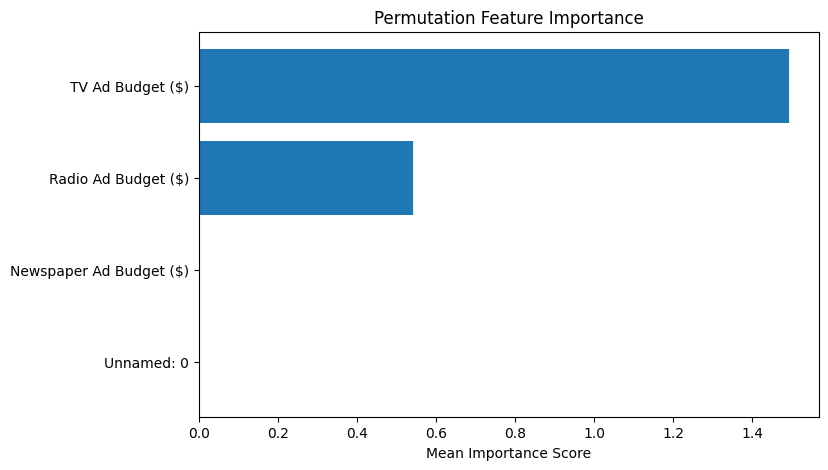

In [10]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import pandas as pd

# Get importances
result = permutation_importance(models["Gradient Boosting"], X_test, y_test, n_repeats=10, random_state=42)

# Convert to DataFrame
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": result.importances_mean
}).sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(8, 5))
plt.barh(importance_df["Feature"], importance_df["Importance"])
plt.gca().invert_yaxis()
plt.title("Permutation Feature Importance")
plt.xlabel("Mean Importance Score")
plt.show()

# Partial Dependency Plots

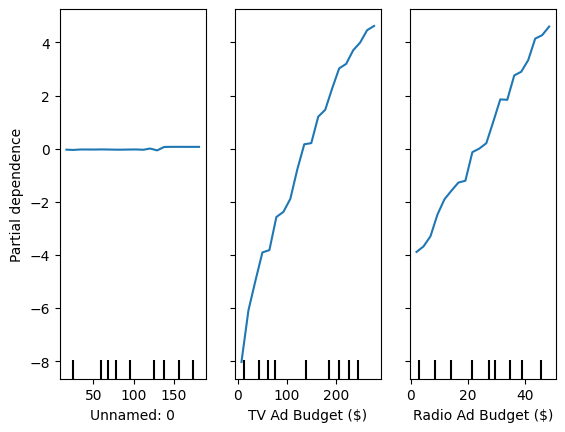

In [11]:
from sklearn.inspection import PartialDependenceDisplay

PartialDependenceDisplay.from_estimator(
    models["Gradient Boosting"],
    X_test,
    features=[0, 1, 2],  # TV, Radio, Newspaper
    feature_names=X.columns,
    grid_resolution=20,
)
plt.show()

# SHAP for Deep Dive Explainability

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


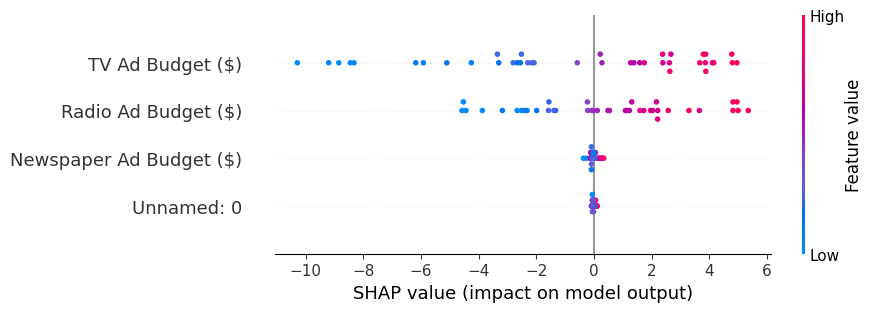

In [14]:
import shap

# SHAP explainer for Gradient Boosting
explainer = shap.Explainer(models["Gradient Boosting"])
shap_values = explainer(X_test)

# Beeswarm: Global feature impact
shap.plots.beeswarm(shap_values)